## 📋 Assessment 시스템 테스트 결과 분석

각 셀을 실행하면서 다음 사항들을 확인해보세요:

### 🔍 확인할 포인트:

1. **MCP 연결 상태**: 도구가 정상적으로 로드되는지
2. **각 Assessor 작동**: 5단계 평가가 순서대로 진행되는지  
3. **LLM 응답 품질**: 자연스러운 대화 흐름인지
4. **오류 처리**: 예외 상황 발생시 적절한 처리인지

### 📝 테스트 방법:
1. 첫 번째 셀을 실행하여 MCP 서버 연결 확인
2. 각 평가 단계 셀을 순서대로 실행
3. 에이전트의 응답과 다음 질문을 관찰
4. 필요시 추가 대화 진행

In [1]:
# 7. 수준 측정 테스트 (LevelAssessor)
print("\\n📈 수준 측정 테스트")
await astream_graph(agent, {"messages": "파이썬은 완전 처음이에요, 프로그래밍 자체가 처음이에요"})

\n📈 수준 측정 테스트


NameError: name 'astream_graph' is not defined

In [ ]:
# 6. 예산 평가 테스트 (BudgetAssessor)
print("\\n💰 예산 평가 테스트")
await astream_graph(agent, {"messages": "한 달에 5만원 정도까지는 쓸 수 있어요"})

In [ ]:
# 📝 실제 대화형 테스트 가이드

print(\"\"\"
\\n📋 **실제 테스트 방법**:

1️⃣ 첫 번째 셀을 실행해서 session_id를 확인
2️⃣ 얻은 session_id를 복사해서 아래 셀들의 'session_id' 값을 교체
3️⃣ 각 셀을 순서대로 실행하면서 대화형 평가 진행 과정 관찰
4️⃣ assess_user 도구로 사용자 입력을 시뮬레이션
5️⃣ confirm_and_proceed 도구로 다음 단계로 진행

이렇게 하면 topic → goal → time → budget → level 순서로 
상태 기반 대화형 평가 시스템이 작동하는 것을 확인할 수 있습니다! 🚀
\"\"\")

In [ ]:
# 4. 목표 평가 테스트
print("\\n4️⃣ 목표 평가")

session_id = "274781a6-4ff3-45ba-8e00-0d4cab7b4a83"  # 동일한 session_id 사용

await astream_graph(agent, {"messages": f"assess_user 도구를 사용해서 session_id는 '{session_id}', user_input은 '취업을 위해서 공부하려고 해요'로 평가를 진행해줘"})

In [ ]:
# 3. 다음 단계로 진행 테스트
print("\\n3️⃣ 주제 확인 후 다음 단계로 진행")

session_id = "274781a6-4ff3-45ba-8e00-0d4cab7b4a83"  # 동일한 session_id 사용

await astream_graph(agent, {"messages": f"confirm_and_proceed 도구를 사용해서 session_id는 '{session_id}', confirmed는 true로 설정해서 다음 단계로 진행해줘"})

In [8]:
# 2. 주제 평가 테스트 
print("\\n2️⃣ 주제 평가 - 사용자 입력 시뮬레이션")

# 실제로 생성된 session_id 사용使用
session_id = "274781a6-4ff3-45ba-8e00-0d4cab7b4a83"  # 위에서 확인한 session_id

await astream_graph(agent, {"messages": f"assess_user 도구를 사용해서 session_id는 '{session_id}', user_input은 '파이썬 프로그래밍을 배우고 싶어요'로 평가를 진행해줘"})

\n2️⃣ 주제 평가 - 사용자 입력 시뮬레이션

🔄 Node: agent 🔄
- - - - - - - - - - - - - - - - - - - - - - - - - 

🔄 Node: tools 🔄
- - - - - - - - - - - - - - - - - - - - - - - - - 
Error: ClosedResourceError()
 Please fix your mistakes.
🔄 Node: agent 🔄
- - - - - - - - - - - - - - - - - - - - - - - - - 
죄송합니다만, 도구에 문제가 있는 것 같습니다. assess_user 도구를 사용할 수 없네요. 사용자님의 '파이썬 프로그래밍을 배우고 싶다'는 요청은 이해했습니다. 혹시 다른 방식으로 도움이 필요하신가요?

{'node': 'agent',
 'content': AIMessageChunk(content='', additional_kwargs={}, response_metadata={'finish_reason': 'stop', 'model_name': 'midm-2.0:base', 'system_fingerprint': 'fp_ollama'}, id='run--0aa64ff2-5cde-45f6-80d7-c7d544f2209d'),
 'metadata': {'langgraph_step': 3,
  'langgraph_node': 'agent',
  'langgraph_triggers': ('branch:to:agent',),
  'langgraph_path': ('__pregel_pull', 'agent'),
  'langgraph_checkpoint_ns': 'agent:ea2cc5fb-8b6e-020e-8f3b-b7db6e61f603',
  'checkpoint_ns': 'agent:ea2cc5fb-8b6e-020e-8f3b-b7db6e61f603',
  'ls_provider': 'openai',
  'ls_model_name': 'midm-2.0:base',
  'ls_model_type': 'chat',
  'ls_temperature': 0.0,
  'ls_max_tokens': 8192}}

In [10]:
from mcp import ClientSession, StdioServerParameters
from mcp.client.stdio import stdio_client
from langchain_mcp_adapters.tools import load_mcp_tools
from langgraph.prebuilt import create_react_agent
from langchain_openai import ChatOpenAI
from utils import astream_graph


llm = ChatOpenAI(
    base_url="http://localhost:11434/v1",
    api_key="ollama",
    model="midm-2.0:base",  # tool calling 지원 모델 사용
    temperature=0.0,
    max_tokens=8192,
)


# StdIO 서버 파라미터 설정 - user_assessment.py 사용
server_params = StdioServerParameters(
    command="python",
    args=["servers/user_assessment.py"],  # 상태 관리가 있는 완전한 서버 사용
)

# StdIO 클라이언트를 사용하여 서버와 통신
async with stdio_client(server_params) as (read, write):
    # 클라이언트 세션 생성
    async with ClientSession(read, write) as session:
        # 연결 초기화
        await session.initialize()

        # MCP 도구 로드
        tools = await load_mcp_tools(session)
        print(f"Loaded MCP tools count: {len(tools)}")
        print("Tools:", [tool.name for tool in tools])

        # 에이전트 생성
        agent = create_react_agent(llm, tools)
        
        # 시스템 정보 확인
        print("\\n=== User Assessment 시스템 정보 ===")
        await astream_graph(agent, {"messages": "get_system_info 도구를 사용해서 시스템 정보를 확인해줘"})

        # 1. 평가 시작
        print("\\n1️⃣ 평가 시작")
        await astream_graph(agent, {"messages": "start_assessment 도구를 사용해서 학습 평가를 시작해줘"})

        # 2. 주제 평가
        print("\\n2️⃣ 주제 평가")
        await astream_graph(agent, {"messages": "assess_user 도구를 사용해서 사용자 입력을 평가해줘"})

        # 3. 목표 평가
        print("\\n3️⃣ 목표 평가")
        await astream_graph(agent, {"messages": "assess_user 도구를 사용해서 사용자 입력을 평가해줘"})

Loaded MCP tools count: 4
Tools: ['start_assessment', 'get_system_info', 'assess_user', 'confirm_and_proceed']
\n=== User Assessment 시스템 정보 ===

🔄 Node: agent 🔄
- - - - - - - - - - - - - - - - - - - - - - - - - 

🔄 Node: tools 🔄
- - - - - - - - - - - - - - - - - - - - - - - - - 
{
  "server_name": "User Assessment MCP Server",
  "version": "1.0.0",
  "llm_model": "midm-2.0:base",
  "kmooc_courses_count": 1500,
  "active_sessions_count": 0,
  "assessment_stages": [
    "topic",
    "goal",
    "time",
    "budget",
    "level"
  ],
  "available_tools": [
    "start_assessment",
    "assess_user",
    "get_system_info"
  ],
  "status": "running",
  "timestamp": "2025-09-05T09:03:00.055457"
}
🔄 Node: agent 🔄
- - - - - - - - - - - - - - - - - - - - - - - - - 
시스템 정보를 확인했습니다. 현재 서버는 User Assessment MCP Server 버전 1.0.0을 사용 중이며, midm-2.0 모델 기반으로 작동하고 있습니다. 총 1500개의 K-MOOC 강좌가 등록되어 있고, 현재 활성 세션은 없습니다. 평가 단계로는 주제(topic), 목표(goal), 시간(time), 예산(budget), 수준(level)이 있으며, 지금까지 요청하신 도구 외에도 'start_as

In [11]:
# StdIO 클라이언트를 사용하여 서버와 통신
async with stdio_client(server_params) as (read, write):
    # 클라이언트 세션 생성
    async with ClientSession(read, write) as session:

        await astream_graph(agent, {"messages": "안녕? 나는 개발자가 되고 싶어"})


🔄 Node: agent 🔄
- - - - - - - - - - - - - - - - - - - - - - - - - 
안녕하세요! 개발자가 되려는 꿈을 가지고 계시는군요. 정말 멋진 목표예요. 어떤 분야의 개발에 관심이 있으신가요? 웹, 앱, 게임 등 다양한 영역이 있는데 궁금해요.

In [13]:
# StdIO 클라이언트를 사용하여 서버와 통신
async with stdio_client(server_params) as (read, write):
    # 클라이언트 세션 생성
    async with ClientSession(read, write) as session:

        await astream_graph(agent, {"messages": "컴퓨터 비전 개발자가 되고 싶어"})


🔄 Node: agent 🔄
- - - - - - - - - - - - - - - - - - - - - - - - - 
안녕하세요! 컴퓨터 비전 개발자에 관심을 가져주셔서 반갑습니다. 컴퓨터 비전 분야는 정말 흥미로운 영역이에요. 어떤 부분이 가장 궁금하신가요? 현재 개발 경험이나 배경지식은 어느 정도 있으신지 알 수 있을까요?

/opt/anaconda3/envs/kt_competition/lib/python3.11/site-packages/urllib3/connectionpool.py:1097: InsecureRequestWarning: Unverified HTTPS request is being made to host 'mermaid.ink'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#tls-warnings
  warnings.warn(


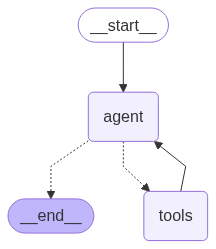

In [10]:
from IPython.display import Image, display

try:
    display(Image(agent.get_graph(xray=True).draw_mermaid_png()))
except Exception:
    pass

In [ ]:
# 대화형 평가 테스트

print("\\n=== 대화형 평가 시스템 테스트 ===")

# 1. 평가 시작
print("\\n1️⃣ 평가 시작")
await astream_graph(agent, {"messages": "start_assessment 도구를 사용해서 학습 평가를 시작해줘"})